## Dark Emulator

- [Dark Quest Project Webpage](https://darkquestcosmology.github.io/)
- [Public Github repo](https://github.com/DarkQuestCosmology/dark_emulator_public)
- [Document of the Emulator](https://dark-emulator.readthedocs.io/en/latest/)

### The `darkemu` tutorial

In [111]:
%load_ext autoreload
%autoreload 2
%pylab inline

import os
import logging

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table

from palettable.scientific.sequential import Batlow_7

mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
pil_logger = logging.getLogger('PIL')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [5]:
from dark_emulator import darkemu

In [6]:
emu = darkemu.base_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


#### Cosmology parameters

- `cparam`: `Omega_b`, `Omega_m`, `Omega_DE`, `ln(10^10 A_s)`, `n_s`, `w` 

In [86]:
cparam = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])
emu.set_cosmology(cparam)

#### DeltaSigma profiles at fixed halo mass

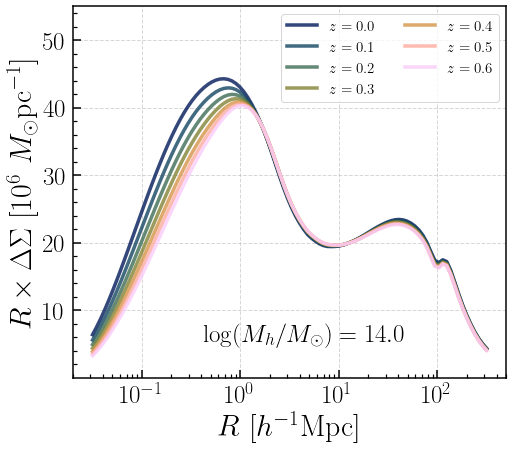

In [6]:
rs = np.logspace(-1.5, 2.5, 100)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.0, hspace=0.0)

ax1 = fig.add_subplot(111)
ax1.set_xscale("log", nonpositive='clip')

for ii, z in enumerate(np.linspace(0.0, 0.6, 7)):
    
    dsigma = emu.get_DeltaSigma_mass(rs, 2e14, z)

    ax1.plot(
        rs, rs * dsigma, label='$z={:3.1f}$'.format(z), c=Batlow_7.mpl_colors[ii],
        linewidth=3.5, alpha=0.8
    )
    ax1.legend(fontsize=15, ncol=2, loc='best')
    ax1.set_ylim(0.001, 55)
               
    _ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
    _ = ax1.set_ylabel(r"$R \times \Delta\Sigma\ [10^{6}\ M_\odot \mathrm{pc}^{-1}]$", fontsize=30)

_ = ax1.text(0.3, 0.1, r"$\log (M_{h}/M_{\odot}) = 14.0$", fontsize=25, transform=ax1.transAxes)

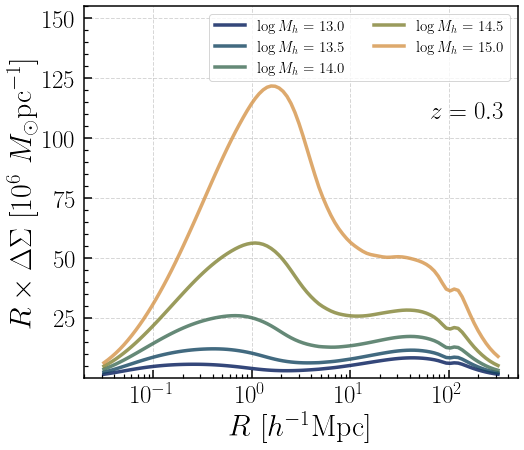

In [54]:
rs = np.logspace(-1.5, 2.5, 100)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.0, hspace=0.0)

ax1 = fig.add_subplot(111)
ax1.set_xscale("log", nonpositive='clip')

for ii, logm in enumerate(np.linspace(13.0, 15.0, 5)):
    
    dsigma = emu.get_DeltaSigma_mass(rs, 10.0 ** logm, 0.3)

    ax1.plot(
        rs, rs * dsigma, label=r"$\log M_h={:4.1f}$".format(logm), c=Batlow_7.mpl_colors[ii],
        linewidth=3.5, alpha=0.8
    )
    ax1.legend(fontsize=15, ncol=2, loc='best')
    ax1.set_ylim(0.001, 155)
               
    _ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
    _ = ax1.set_ylabel(r"$R \times \Delta\Sigma\ [10^{6}\ M_\odot \mathrm{pc}^{-1}]$", fontsize=30)

_ = ax1.text(0.8, 0.7, r"$z=0.3$", fontsize=25, transform=ax1.transAxes)

#### DeltaSigma profiles with halo mass threshold

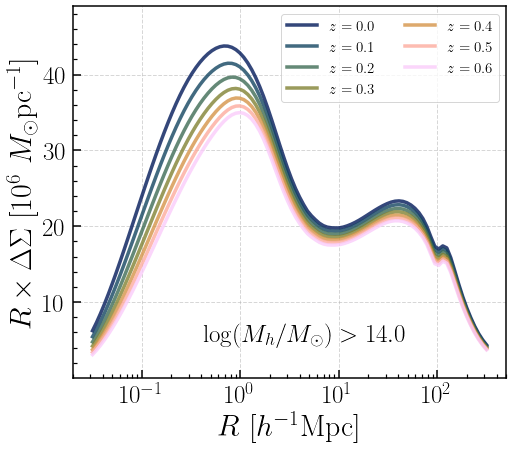

In [55]:
rs = np.logspace(-1.5, 2.5, 100)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.0, hspace=0.0)

ax1 = fig.add_subplot(111)
ax1.set_xscale("log", nonpositive='clip')

for ii, z in enumerate(np.linspace(0.0, 0.6, 7)):
    
    dsigma = emu.get_DeltaSigma_massthreshold(rs, 1e14, z)

    ax1.plot(
        rs, rs * dsigma, label='$z={:3.1f}$'.format(z), c=Batlow_7.mpl_colors[ii],
        linewidth=3.5, alpha=0.8
    )
    ax1.legend(fontsize=15, ncol=2, loc='best')
    ax1.set_ylim(0.001, 49)
               
    _ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
    _ = ax1.set_ylabel(r"$R \times \Delta\Sigma\ [10^{6}\ M_\odot \mathrm{pc}^{-1}]$", fontsize=30)

_ = ax1.text(0.3, 0.1, r"$\log (M_{h}/M_{\odot}) > 14.0$", fontsize=25, transform=ax1.transAxes)

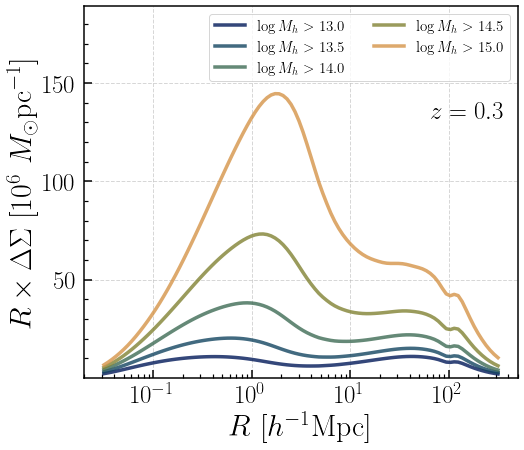

In [56]:
rs = np.logspace(-1.5, 2.5, 100)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.0, hspace=0.0)

ax1 = fig.add_subplot(111)
ax1.set_xscale("log", nonpositive='clip')

for ii, logm in enumerate(np.linspace(13.0, 15.0, 5)):
    
    dsigma = emu.get_DeltaSigma_massthreshold(rs, 10.0 ** logm, 0.3)

    ax1.plot(
        rs, rs * dsigma, label=r"$\log M_h>{:4.1f}$".format(logm), c=Batlow_7.mpl_colors[ii],
        linewidth=3.5, alpha=0.8
    )
    ax1.legend(fontsize=15, ncol=2, loc='best')
    ax1.set_ylim(0.001, 189)
               
    _ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
    _ = ax1.set_ylabel(r"$R \times \Delta\Sigma\ [10^{6}\ M_\odot \mathrm{pc}^{-1}]$", fontsize=30)

_ = ax1.text(0.8, 0.7, r"$z=0.3$", fontsize=25, transform=ax1.transAxes)

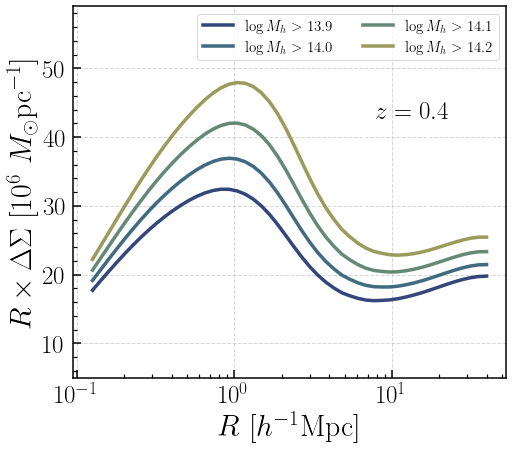

In [18]:
rs = np.logspace(-0.9, 1.6, 50)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.0, hspace=0.0)

ax1 = fig.add_subplot(111)
ax1.set_xscale("log", nonpositive='clip')

for ii, logm in enumerate([13.9, 14.0, 14.1, 14.2]):
    
    dsigma = emu.get_DeltaSigma_massthreshold(rs, 10.0 ** logm, 0.4)

    ax1.plot(
        rs, rs * dsigma, label=r"$\log M_h>{:4.1f}$".format(logm), c=Batlow_7.mpl_colors[ii],
        linewidth=3.5, alpha=0.8
    )
    ax1.legend(fontsize=15, ncol=2, loc='best')
    ax1.set_ylim(5, 59)
               
    _ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
    _ = ax1.set_ylabel(r"$R \times \Delta\Sigma\ [10^{6}\ M_\odot \mathrm{pc}^{-1}]$", fontsize=30)

_ = ax1.text(0.7, 0.7, r"$z=0.4$", fontsize=25, transform=ax1.transAxes)

### HOD Model

In [87]:
from dark_emulator import model_hod

- [Available mass concentration relation model](https://bdiemer.bitbucket.io/colossus/halo_concentration.html)

In [92]:
hod = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.0, "M_int_logMax": 15.2})

cparam = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam = {"logMmin":13.68, "sigma_sq":0.79, "logM1": 14.56, "alpha": 1.00, "kappa": 1.19, # HOD parameters
           "poff": 0.3, "Roff": 0.2, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
           "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
           "alpha_inc": 0.60, "logM_inc": 14.0} # incompleteness parameters. For details, see More et al. (2015)

hod.set_cosmology(cparam)
hod.set_galaxy(gparam)

redshift = 0.42
rs = np.logspace(-1.5, 2.0, 80)

# Galaxy abundance; unit is h^3 Mpc^{-3}
hod.get_ng(redshift)

dsig_tot = hod.get_ds(rs, redshift)
dsig_cen = hod.get_ds_cen(rs, redshift)
dsig_off = hod.get_ds_cen_off(rs, redshift)
dsig_sat = hod.get_ds_sat(rs, redshift)

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


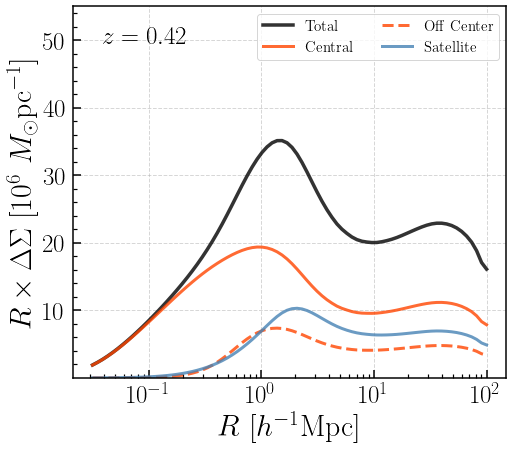

In [93]:
fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.0, hspace=0.0)

ax1 = fig.add_subplot(111)
ax1.set_xscale("log", nonpositive='clip')

ax1.plot(rs, rs * dsig_tot, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8)
ax1.plot(rs, rs * dsig_cen, label=r"$\rm Central$", c='orangered', linewidth=3.0, alpha=0.8)
ax1.plot(rs, rs * dsig_off, label=r"$\rm Off\ Center$", c='orangered', linestyle='--', linewidth=3.0, alpha=0.8)
ax1.plot(rs, rs * dsig_sat, label=r"$\rm Satellite$", c='steelblue', linewidth=3.0, alpha=0.8)

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.001, 55)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$R \times \Delta\Sigma\ [10^{6}\ M_\odot \mathrm{pc}^{-1}]$", fontsize=30)

_ = ax1.text(0.07, 0.90, r"$z={:4.2f}$".format(redshift), fontsize=25, transform=ax1.transAxes)

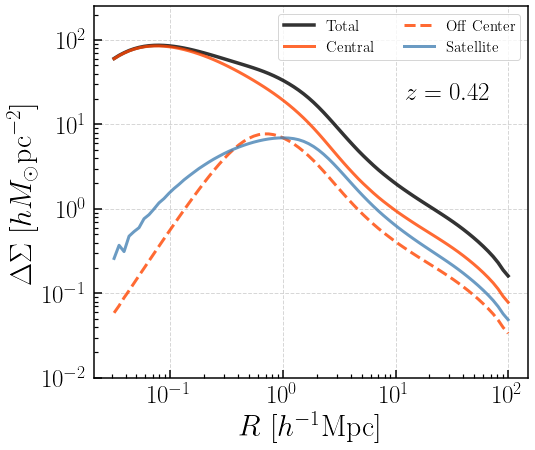

In [94]:
fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.0, hspace=0.0)

ax1 = fig.add_subplot(111)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_cen, label=r"$\rm Central$", c='orangered', linewidth=3.0, alpha=0.8)
ax1.plot(rs, dsig_off, label=r"$\rm Off\ Center$", c='orangered', linestyle='--', linewidth=3.0, alpha=0.8)
ax1.plot(rs, dsig_sat, label=r"$\rm Satellite$", c='steelblue', linewidth=3.0, alpha=0.8)

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 250)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

_ = ax1.text(0.72, 0.75, r"$z={:4.2f}$".format(redshift), fontsize=25, transform=ax1.transAxes)

In [95]:
des_dir = '/Users/song/Dropbox/work/project/topn/data/dsigma/des/'
des_1 = Table.read(os.path.join(des_dir, 'full-unblind-v2-mcal-zmix_y1subtr_l3_z1_profile.dat'), format='ascii')

In [101]:
hod = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.0, "M_int_logMax": 15.2})

cparam = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam = {"logMmin":13.68, "sigma_sq":0.8, 
          "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
          "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
          "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
          "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod.set_cosmology(cparam)
hod.set_galaxy(gparam)

redshift = 0.43
rs = np.logspace(-1.5, 2.0, 80)

# Galaxy abundance; unit is h^3 Mpc^{-3}
hod.get_ng(redshift)

dsig_tot = hod.get_ds(rs, redshift)
dsig_cen = hod.get_ds_cen(rs, redshift)
dsig_off = hod.get_ds_cen_off(rs, redshift)
dsig_sat = hod.get_ds_sat(rs, redshift)

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


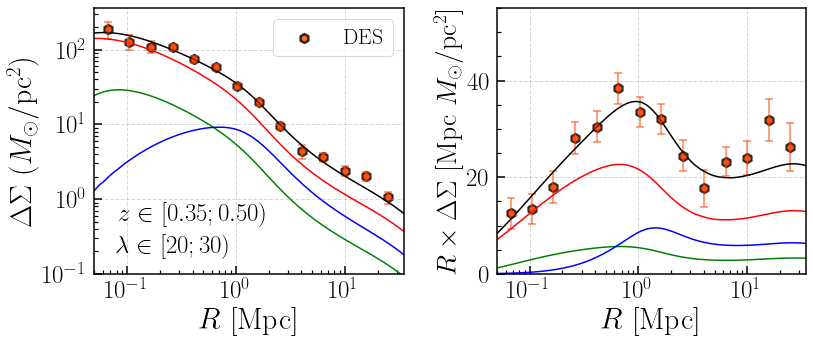

In [102]:
fig = plt.figure(figsize=(11.5, 9))
fig.subplots_adjust(left=0.13, right=0.99, bottom=0.13, top=0.95,
                    wspace=0.3, hspace=0.0)

# ---------------------------------------------------------------------- #
ax1 = fig.add_subplot(221)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

# ---- DeltaSigma ---- #
# DES Profile
ax1.errorbar(
    des_1['r_mpc'], des_1['dsigma'], yerr=des_1['dsig_err'],
    ecolor='orangered', color='orangered', alpha=0.5, capsize=4, capthick=2.0, elinewidth=2.0, 
    label='__no_label__', fmt='o')
ax1.scatter(
    des_1['r_mpc'] , des_1['dsigma'], s=80, alpha=0.8, marker='h', 
    facecolor='orangered', edgecolor='k', label=r'$\rm DES$', linewidth=2.5)

ax1.plot(rs * 0.7, dsig_tot / 0.7, c='k')
ax1.plot(rs * 0.7, dsig_cen / 0.7, c='r')
ax1.plot(rs * 0.7, dsig_off / 0.7, c='g')
ax1.plot(rs * 0.7, dsig_sat / 0.7, c='b')

ax1.legend(loc='best', fontsize=22)

_ = ax1.set_xlim(0.05, 35)
_ = ax1.set_ylim(0.1, 359)

ax1.set_xlabel(r'$R\ [\mathrm{Mpc}]$', fontsize=30)
ax1.set_ylabel(r'$\Delta\Sigma\ (M_{\odot}/\mathrm{pc}^2)$', fontsize=30)

ax1.text(0.08, 0.20, r'$z\in [0.35; 0.50)$', transform=ax1.transAxes, fontsize=25)
ax1.text(0.07, 0.08, r'$\lambda \in [20; 30)$', transform=ax1.transAxes, fontsize=25)


# ---- R x DeltaSigma ---- #
ax2 = fig.add_subplot(222)
ax2.set_xscale("log", nonpositive='clip')


# DES Profile
ax2.errorbar(
    des_1['r_mpc'], des_1['r_mpc'] * des_1['dsigma'], 
    yerr=(des_1['r_mpc'] * des_1['dsig_err']),
    ecolor='orangered', color='orangered', alpha=0.5, capsize=4, capthick=2.0, elinewidth=2.0, 
    label='__no_label__', fmt='o')
ax2.scatter(
    des_1['r_mpc'] , des_1['r_mpc'] * des_1['dsigma'], s=80, alpha=0.8, 
    marker='h', facecolor='orangered', edgecolor='k', label=r'$\rm DES$', linewidth=2.5)

ax2.plot(rs * 0.7, rs * dsig_tot, c='k')
ax2.plot(rs * 0.7, rs * dsig_cen, c='r')
ax2.plot(rs * 0.7, rs * dsig_off, c='g')
ax2.plot(rs * 0.7, rs * dsig_sat, c='b')

_ = ax2.set_xlim(0.05, 35)
_ = ax2.set_ylim(0.0, 55)

_ = ax2.set_xlabel(r'$R\ [\mathrm{Mpc}]$', fontsize=30)
_ = ax2.set_ylabel(
    r'$R \times \Delta\Sigma\ [{\rm Mpc}\ M_{\odot}/\mathrm{pc}^2]$', fontsize=28)

### Check the influence of different parameters

#### Halo Mass

In [121]:
hod = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam = {"logMmin":13.68, "sigma_sq":0.8, 
          "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
          "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
          "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
          "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod.set_cosmology(cparam)
hod.set_galaxy(gparam)

redshift = 0.43
rs = np.logspace(-1.5, 2.0, 80)

# Galaxy abundance; unit is h^3 Mpc^{-3}
hod.get_ng(redshift)

dsig_tot = hod.get_ds(rs, redshift)
dsig_cen = hod.get_ds_cen(rs, redshift)
dsig_off = hod.get_ds_cen_off(rs, redshift)
dsig_sat = hod.get_ds_sat(rs, redshift)

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


In [122]:
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.0, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

# Galaxy abundance; unit is h^3 Mpc^{-3}
hod_1.get_ng(redshift)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


In [123]:
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.4, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

# Galaxy abundance; unit is h^3 Mpc^{-3}
hod_2.get_ng(redshift)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


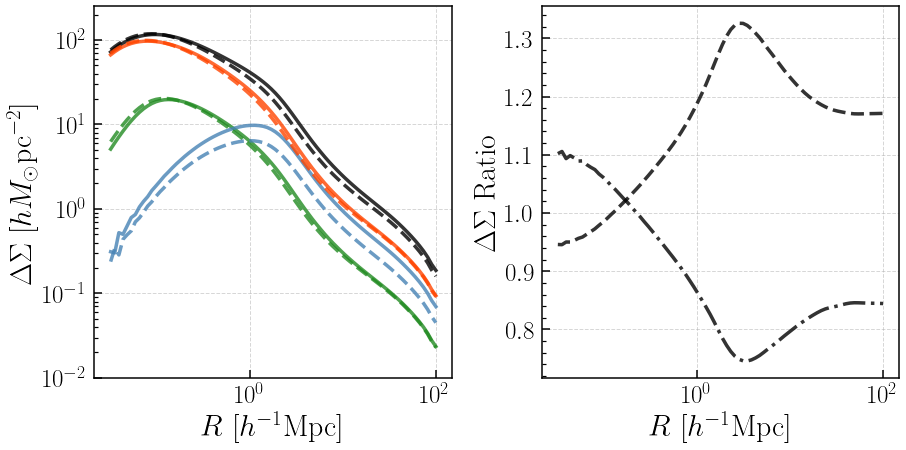

In [125]:
fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_cen, label=r"$\rm Central$", c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, label=r"$\rm Off\ Center$", c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, label=r"$\rm Satellite$", c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_cen_1, label=r"$\rm Central$", c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, label=r"$\rm Off\ Center$", c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, label=r"$\rm Satellite$", c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

#ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 250)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### Change `LogM1`

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 48
DEBUG:PIL.PngImagePlugin:STREAM b'tRNS' 101 15
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 128 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 149 314


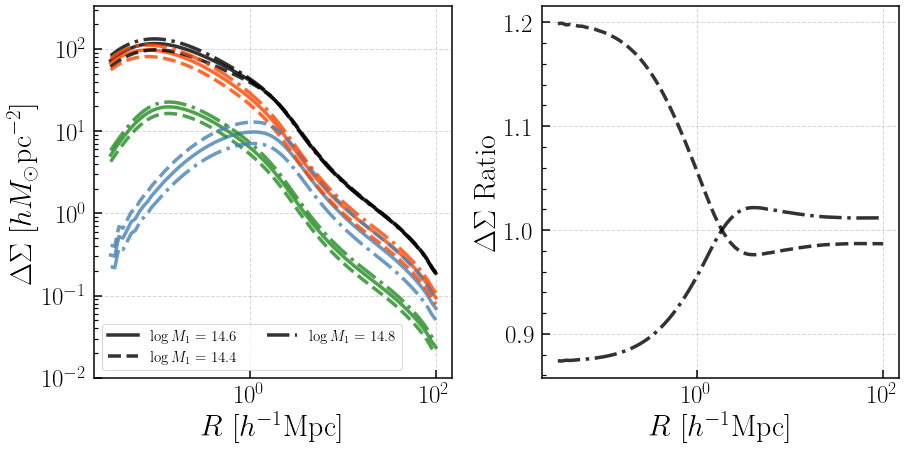

In [127]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.4, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

# HOD 2
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.8, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"$\log M_{1}=14.6$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"$\log M_{1}=14.4$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.plot(rs, dsig_tot_2, c='k', linewidth=3.5, alpha=0.8, linestyle='-.', label=r"$\log M_{1}=14.8$")
ax1.plot(rs, dsig_cen_2, c='orangered', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_off_2, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_sat_2, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='-.')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### Change `logMmin`

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


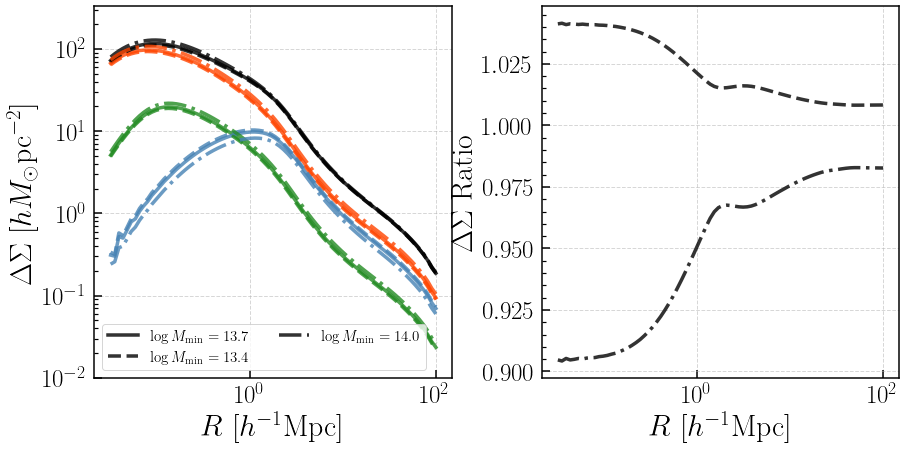

In [129]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.4, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

# HOD 2
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":14.0, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"$\log M_{\rm min}=13.7$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"$\log M_{\rm min}=13.4$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.plot(rs, dsig_tot_2, c='k', linewidth=3.5, alpha=0.8, linestyle='-.', label=r"$\log M_{\rm min}=14.0$")
ax1.plot(rs, dsig_cen_2, c='orangered', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_off_2, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_sat_2, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='-.')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### Change `sigma_sq`

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


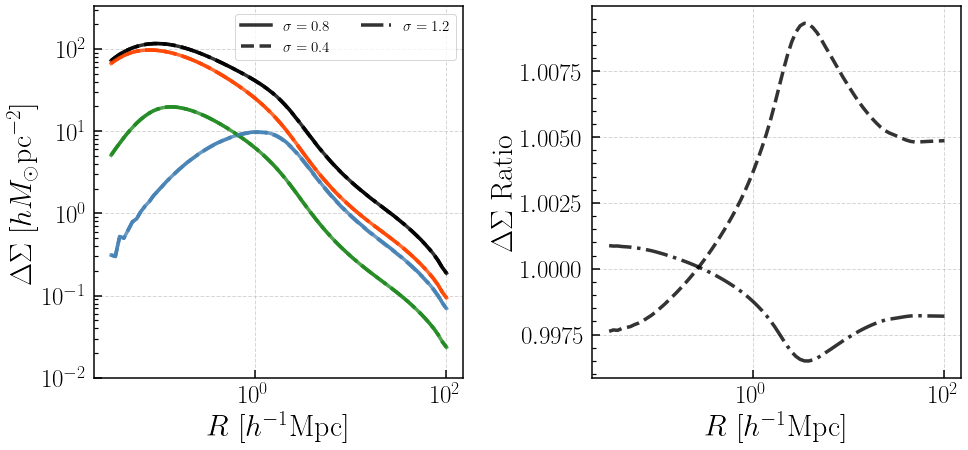

In [131]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.4, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

# HOD 2
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":13.68, "sigma_sq":1.2, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.35, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"$\sigma=0.8$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"$\sigma=0.4$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.plot(rs, dsig_tot_2, c='k', linewidth=3.5, alpha=0.8, linestyle='-.', label=r"$\sigma=1.2$")
ax1.plot(rs, dsig_cen_2, c='orangered', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_off_2, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_sat_2, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='-.')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### Change `alpha`

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 48
DEBUG:PIL.PngImagePlugin:STREAM b'tRNS' 101 15
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 128 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 149 163
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 48
DEBUG:PIL.PngImagePlugin:STREAM b'tRNS' 101 15
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 128 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 149 134


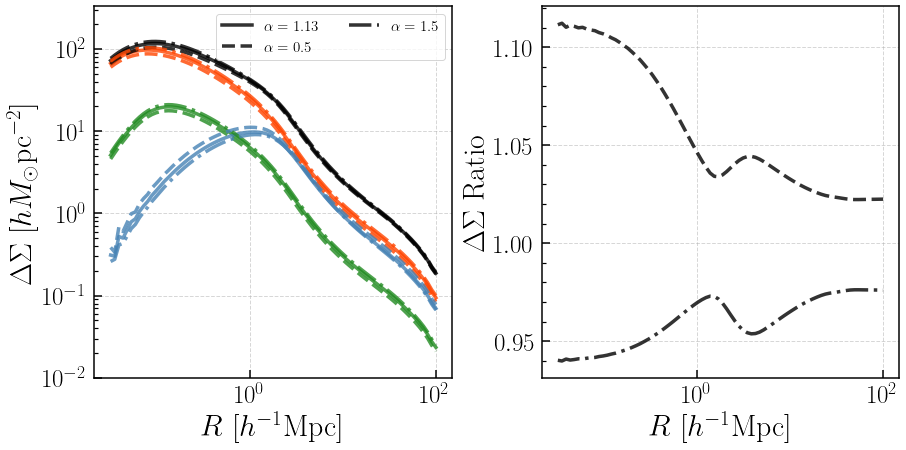

In [134]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 0.5, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

# HOD 2
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.5, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"$\alpha=1.13$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"$\alpha=0.5$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.plot(rs, dsig_tot_2, c='k', linewidth=3.5, alpha=0.8, linestyle='-.', label=r"$\alpha=1.5$")
ax1.plot(rs, dsig_cen_2, c='orangered', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_off_2, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_sat_2, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='-.')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### Change `kappa`

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


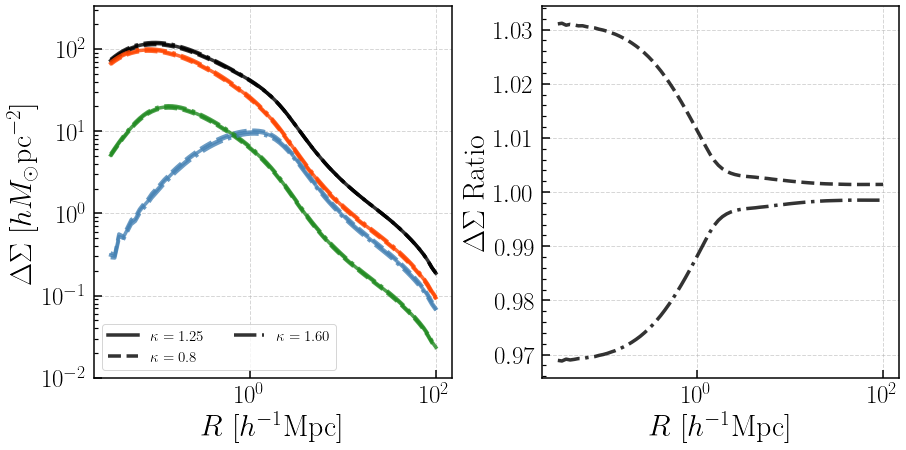

In [136]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 0.8, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

# HOD 2
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.6, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"$\kappa=1.25$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"$\kappa=0.8$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.plot(rs, dsig_tot_2, c='k', linewidth=3.5, alpha=0.8, linestyle='-.', label=r"$\kappa=1.60$")
ax1.plot(rs, dsig_cen_2, c='orangered', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_off_2, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_sat_2, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='-.')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### Change `poff`

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


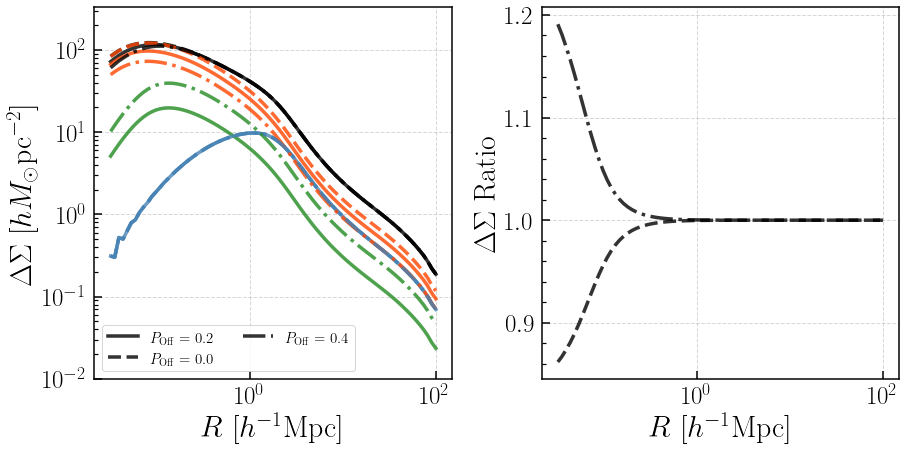

In [138]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.0, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)


hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

# HOD 2
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.4, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"$P_{\rm Off}=0.2$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"$P_{\rm Off}=0.0$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.plot(rs, dsig_tot_2, c='k', linewidth=3.5, alpha=0.8, linestyle='-.', label=r"$P_{\rm Off}=0.4$")
ax1.plot(rs, dsig_cen_2, c='orangered', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_off_2, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_sat_2, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='-.')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### Change `Roff`

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


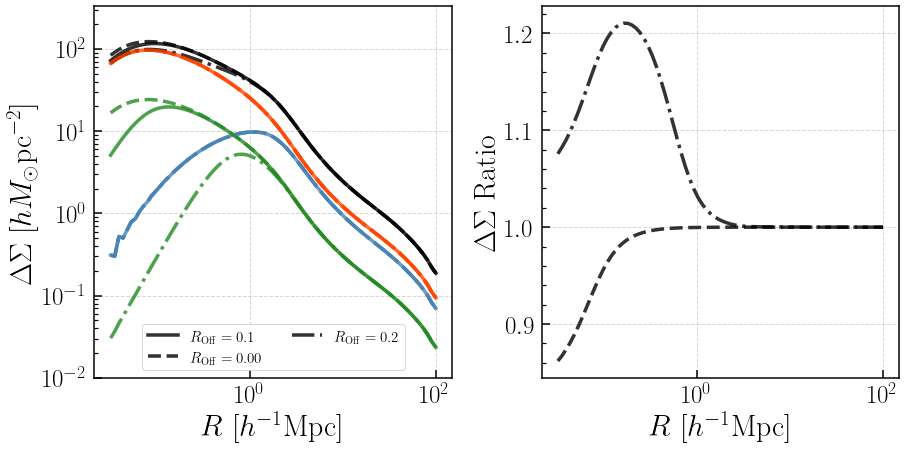

In [141]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.00, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

# HOD 2
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.2, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"$R_{\rm Off}=0.1$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"$R_{\rm Off}=0.00$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.plot(rs, dsig_tot_2, c='k', linewidth=3.5, alpha=0.8, linestyle='-.', label=r"$R_{\rm Off}=0.2$")
ax1.plot(rs, dsig_cen_2, c='orangered', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_off_2, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_sat_2, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='-.')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### Change `sat_dist_type`

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


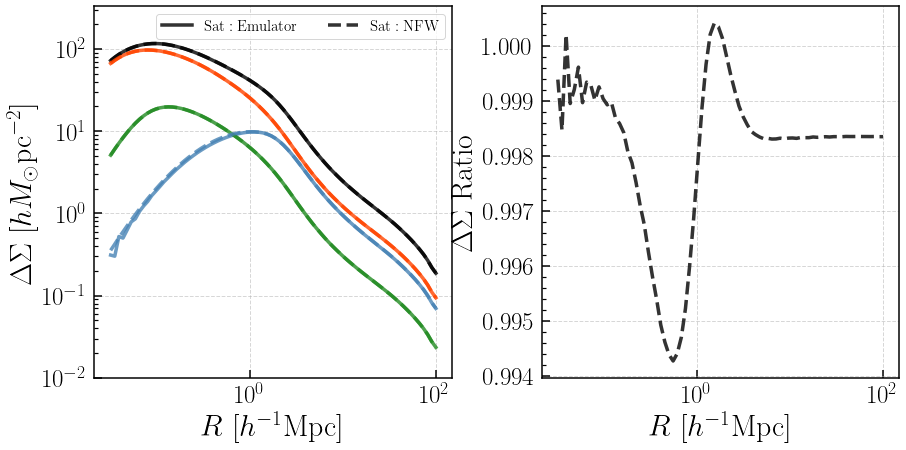

In [145]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "diemer19", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "NFW", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"${\rm Sat: Emulator}$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"${\rm Sat: NFW}$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


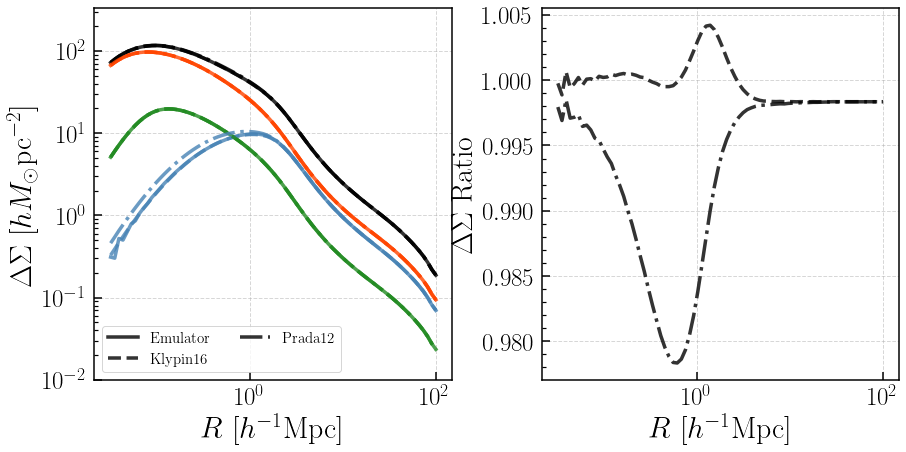

In [149]:
# HOD 1
hod_1 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "klypin16_nu", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_1 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_1 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "NFW", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_1.set_cosmology(cparam_1)
hod_1.set_galaxy(gparam_1)

dsig_tot_1 = hod_1.get_ds(rs, redshift)
dsig_cen_1 = hod_1.get_ds_cen(rs, redshift)
dsig_off_1 = hod_1.get_ds_cen_off(rs, redshift)
dsig_sat_1 = hod_1.get_ds_sat(rs, redshift)

# HOD 2
hod_2 = model_hod.darkemu_x_hod(
    {"fft_num": 8, "c-M_relation": "prada12", 
     "M_int_logMmin": 14.2, "M_int_logMax": 15.2})

cparam_2 = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam_2 = {"logMmin":13.68, "sigma_sq":0.8, 
            "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
            "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
            "sat_dist_type": "NFW", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
            "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

hod_2.set_cosmology(cparam_2)
hod_2.set_galaxy(gparam_2)

dsig_tot_2 = hod_2.get_ds(rs, redshift)
dsig_cen_2 = hod_2.get_ds_cen(rs, redshift)
dsig_off_2 = hod_2.get_ds_cen_off(rs, redshift)
dsig_sat_2 = hod_2.get_ds_sat(rs, redshift)


fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.plot(rs, dsig_tot, c='k', linewidth=3.5, alpha=0.8, label=r"$\rm Emulator$")
ax1.plot(rs, dsig_cen, c='orangered', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_off, c='forestgreen', linewidth=3.5, alpha=0.8)
ax1.plot(rs, dsig_sat, c='steelblue', linewidth=3.5, alpha=0.8)

ax1.plot(rs, dsig_tot_1, c='k', linewidth=3.5, alpha=0.8, linestyle='--', label=r"$\rm Klypin16$")
ax1.plot(rs, dsig_cen_1, c='orangered', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_off_1, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='--')
ax1.plot(rs, dsig_sat_1, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='--')

ax1.plot(rs, dsig_tot_2, c='k', linewidth=3.5, alpha=0.8, linestyle='-.', label=r"$\rm Prada12$")
ax1.plot(rs, dsig_cen_2, c='orangered', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_off_2, c='forestgreen', linewidth=3.5, alpha=0.8, linestyle='-.')
ax1.plot(rs, dsig_sat_2, c='steelblue', linewidth=3.5, alpha=0.8, linestyle='-.')

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(0.01, 329)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$\Delta\Sigma\ [h M_\odot \mathrm{pc}^{-2}]$", fontsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_tot / dsig_tot_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
ax2.plot(rs, dsig_tot / dsig_tot_2, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='-.')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

In [150]:
cparam = np.array([0.02225, 0.1198, 0.6844, 3.094, 0.9645, -1.])

gparam = {"logMmin":13.68, "sigma_sq":0.8, 
          "logM1": 14.6, "alpha": 1.0, "kappa": 1.2, # HOD parameters
          "poff": 0.2, "Roff": 0.02, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
          "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
          "alpha_inc": 0.6, "logM_inc": 13.7} # incompleteness parameters. For details, see More et al. (2015)

redshift = 0.40
rs = np.logspace(-0.9, 1.6, 50)

hod_1 = model_hod.darkemu_x_hod({
    "fft_num": 8, "c-M_relation": "diemer19", "M_int_logMmin": 14.0, "M_int_logMax": 14.2})
hod_1.set_cosmology(cparam)
hod_1.set_galaxy(gparam)
dsig_1 = hod_1.get_ds(rs, redshift)

hod_2 = model_hod.darkemu_x_hod({
    "fft_num": 8, "c-M_relation": "diemer19", "M_int_logMmin": 14.2, "M_int_logMax": 14.4})
hod_2.set_cosmology(cparam)
hod_2.set_galaxy(gparam)
dsig_2 = hod_2.get_ds(rs, redshift)

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


INFO:root:Got same cosmology. Keep quantities already computed.


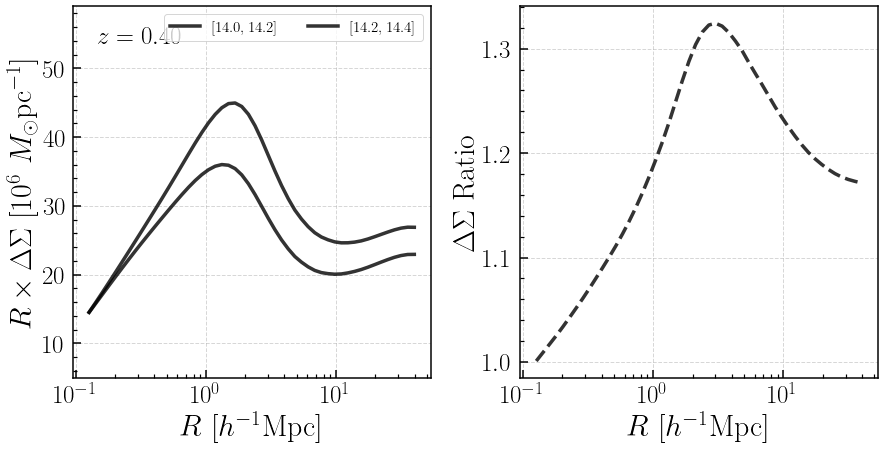

In [155]:
fig = plt.figure(figsize=(13, 6))
fig.subplots_adjust(
    left=0.13, right=0.99, bottom=0.13, top=0.99,
    wspace=0.25, hspace=0.0)

ax1 = fig.add_subplot(121)
ax1.set_xscale("log", nonpositive='clip')

ax1.plot(rs, rs * dsig_1, label=r"$[14.0, 14.2]$", c='k', linewidth=3.5, alpha=0.8)
ax1.plot(rs, rs * dsig_2, label=r"$[14.2, 14.4]$", c='k', linewidth=3.5, alpha=0.8)

ax1.legend(fontsize=15, ncol=2, loc='best')
ax1.set_ylim(5, 59)

_ = ax1.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax1.set_ylabel(r"$R \times \Delta\Sigma\ [10^{6}\ M_\odot \mathrm{pc}^{-1}]$", fontsize=30)

_ = ax1.text(0.07, 0.90, r"$z={:4.2f}$".format(redshift), fontsize=25, transform=ax1.transAxes)

ax2 = fig.add_subplot(122)
ax2.set_xscale("log", nonpositive='clip')

ax2.plot(rs, dsig_2 / dsig_1, label=r"$\rm Total$", c='k', linewidth=3.5, alpha=0.8, linestyle='--')
_ = ax2.set_xlabel(r"$R\ [h^{-1}\mathrm{Mpc}]$", fontsize=30)
_ = ax2.set_ylabel(r"$\Delta\Sigma\ \rm Ratio$", fontsize=30)

#### HOD model

In [1]:
from scipy.special import erf

In [22]:
logmh_min = 13.68
sigma = 0.5

k = 1.19
logmh_1 = 14.56
alpha = 1.0

f_inc = 1.0

logmh = np.linspace(12, 15.5, 1000)

In [34]:
N_c = (1 + erf((logmh - logmh_min) / sigma)) * 0.5 * f_inc

N_s = N_c * ((10.0 ** logmh - k * (10.0 ** logmh_min)) / (10.0 ** logmh_1)) ** alpha

In [84]:
N_c_2 = (1 + erf((logmh - logmh_min) / sigma)) * 0.5 * f_inc

N_s_2 = N_c_2 * ((10.0 ** logmh - k * (10.0 ** logmh_min)) / (10.0 ** logmh_1)) ** 1.2

<ipython-input-84-60bac21e475a>:3: RuntimeWarning: invalid value encountered in power
  N_s_2 = N_c_2 * ((10.0 ** logmh - k * (10.0 ** logmh_min)) / (10.0 ** logmh_1)) ** 1.2


<ipython-input-85-94f1974c733f>:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(logmh, np.log10(N_s), c='skyblue')


(-2.0, 1.0)

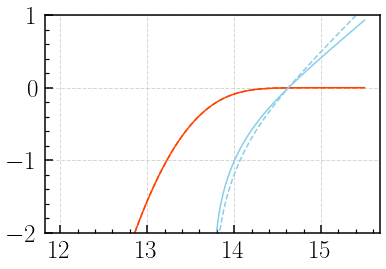

In [85]:
plt.plot(logmh, np.log10(N_c), c='orangered')
plt.plot(logmh, np.log10(N_s), c='skyblue')

plt.plot(logmh, np.log10(N_c_2), c='orangered', linestyle='--')
plt.plot(logmh, np.log10(N_s_2), c='skyblue', linestyle='--')

plt.ylim(-2, 1)